In Google Drive, create the below folder structures and keep the model file and sample images accordingly.<br>
Colab Notebooks/Breast_Cancer_Classification/output/model_name <br>
Here model name you need to change in case you have build a new one. <br>
Colab Notebooks/Breast_Cancer_Classification/sampleTest_Pictures/benign.jpeg <br>
Colab Notebooks/Breast_Cancer_Classification/sampleTest_Pictures/malignant.jpeg <br>
benign and malignant pictures and the model defined above are shared in the course.


In [1]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
mkdir output

In [3]:
mkdir sampleTest_Pictures

In [4]:
mkdir utils

In [19]:
modelName = 'CM_weights-010-0.3063.hdf5'

In [20]:
cp 'gdrive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/output/CM_weights-010-0.3063.hdf5' '/content/output'

In [7]:
cp 'gdrive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/sampleTest_Pictures/benign.png' '/content/sampleTest_Pictures'

In [8]:
cp 'gdrive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/sampleTest_Pictures/malignant.png' '/content/sampleTest_Pictures'

In [9]:
cp 'gdrive/MyDrive/Colab Notebooks/Breast_Cancer_Classification/utils/config.py' '/content/utils'

In [10]:
# Importing the libraries
# from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from utils import config
import numpy as np
import argparse
import cv2
import os

In [21]:
# Model Path
modelPath = config.outputPath + '/' + modelName

In [22]:
# Loading the Breast Cancer detector model
print("Loading Breast Cancer detector model...")
model = load_model(modelPath)

Loading Breast Cancer detector model...


In [26]:
# Setting the Paths
imagePath =  config.PROJ_PATH + "/sampleTest_Pictures/benign.png"

In [27]:
# Loading the input image
image = cv2.imread(imagePath)

1/1 [==============================] - 0s 38ms/step
RESULT :benign: 99.48%


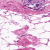

In [28]:
# Convert it from BGR to RGB channel ordering, then Resize it to 48x48, 
# and preprocess it
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image1 = cv2.resize(image1, (48, 48))
image1 = img_to_array(image1)

## The image is now represented by a NumPy array of shape (48, 48, 3), however 
# we need the dimensions to be (1, 3, 48, 48) so we can pass it
# through the network and then we'll also preprocess the image by subtracting the 
# mean RGB pixel intensity from the ImageNet dataset

# image1 = preprocess_input(image1)
image1 /=  255.0

image1 = np.expand_dims(image1, axis=0)

# Pass the image through the model to determine if the person has malignant
(benign, malignant) = model.predict(image1)[0]


# Determine the class label and so the color we will use to add text
label = "benign" if benign > malignant else "malignant"
color = (0, 255, 0) if label == "benign" else (0, 0, 255)

# Adding the probability in the label
label = "{}: {:.2f}%".format(label, max(benign, malignant) * 100)

# Displaying the label on the output image
# cv2.putText(image, label, (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)
        
# Showing the output image
print("RESULT :" +label)
cv2_imshow(image)
# cv2.waitKey(0)